----------------
----------------
# <font color = 'magenta'> <p style='text-align: center;'> RETAIL GIANT SALES FORECASTING</p></font>
----------------------
----------------------
  

## **Part 1 - Data Preparation**
--------------------

## Business Problem

Global Mart is an online supergiant store that has worldwide operations. This store takes orders and delivers across the globe and deals with all the major product categories — consumer, corporate and home office.
As a sales manager for this store, you have to forecast the sales of the products for the next 6 months, so that you have a proper estimate and can plan your inventory and business processes accordingly.


## Data Dictionary


- Order-Date - The date on which the order was placed
- Segment - The segment to which the product belongs
- Market - The market to which the customer belongs
- Sales - Total sales value of the transaction
- Profit - Profit made on the transaction

If you check the entries in the dataset, you will see that the store caters to 7 different geographical market segments and 3 major customer segments, i.e., consumer, corporate and home as can be seen in the table below.

`Market : Segment`

- Africa - Consumer
- APAC (Asia Pacific) - Corporate
- Canada - Home Office
- EMEA(Middle East)
- EU (European Union)
- LATAM (Latin America)
- US (United States)




## How to find the most profitable market segment?

By now, it’s clear that you only need to work on one market-segment which is the most consistently profitable. To find the most consistently profitable market-segment you will be using a measure called "Coefficient of Variation (CoV)". The coefficient of variation or CoV is nothing but the ratio of the standard deviation to mean for the data that it is being calculated for.


But why consider the coefficient of variation here and not the standard deviation for measuring how much variation is present in the data for each of the 21 market segments? and how will the coefficient of variation lead you to the most profitable market segment for which eventually you will want to forecast the sales?


The coefficient of variation is a ratio of the standard deviation to mean. Once you have prepared the data such that you have the Order-Date, Sales and Profit against each of the 21 market segments, and not in the manner as it was in the initial dataset, you can check the standard deviation and the mean calculated on profit for all the 21 market segments and compare. You will find that these values vary a lot and hence it is meaningless to compare the 21 market segment's profits based on the standard deviation and their mean.


Actually, standard deviations are meaningless to compare different datasets as you would see for these 21 market-segments as well. As a better metric to compare the variance between the segments you use the coefficient of variation which will normalise the standard deviation with the mean and give you a comparative figure on the basis of which you can identify the most profitable market segment.


As a part of this assignment, you will find the coefficient of variations for all these 21 market segments and list them in a table and compare them.


Now, it is for you to reason out whether the most profitable market segment should have the least value of CoV or the highest value of CoV. However, please note that as a Sales manager you want to forecast the sales where the market segment is reliable or in other words, there is less variation in the profits.


## Data understanding and preparation

Now let's begin the actual work. You have seen that the data had 5 attributes. These are Order-Date, Market, Segment, Sales, and Profit for each transaction. The complete data dictionary has been given below again for your reference. 

The “Market” attribute has 7-factor levels representing the geographical market sector that the customer belongs to. The “Segment” attribute tells which of the 3 segments that customer belongs to. 

For doing the data preparation —
- 1-	Find the 21 unique Market Segments by combining the respective 7 geographical markets for each of 3 segments such as Home office, Consumer and Corporate.
- 2-	Your dataset after the above step should have Order-Date, Sales, Profit against each market segment such as APAC-Consumer, APAC-Home Office and so on.
- 3-	Once you have understood the dataset of the global data store, you need to get the order date in the required month-year format to make it a monthly aggregated transaction data. For this, convert the order-date into a date-time format for getting it into the Month-year format; you will get the data for 48 months now.
- 4-	After the above step, perform the train-test split such that you take the 42 months as the train data and the 6 months as the test data.
- 5-	Calculate the CoV on the profit for each of the 21 market segments on the train data.
- 6-	Find the most profitable market segment by comparing the 21 CoV values.


Once you have understood the dataset of the global data store, you need to get the order date in the required month-year format to make it a monthly aggregated transaction data. Then, you need to concatenate the market and segment columns such that you get the time series data consisting of order, sales, profit, market segment. The perform the train-test split for the such that you take the 42 months as train data and the 6 months as the test data.


For each of the 21 unique market segments, then calculate the coefficient of variation on the respective profits and compare the CoVs. Conclude the most profitable market segment based on the CoV value. It is expected that you do some research on understanding CoV and how to find it out for all the given market segments in Python.


----------------------------------------------------------------------------
----------------------------------------------------------------------------

In [7]:
# Imports and Warnings
# ====================

import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Sklearn imports
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Imports for Time Series Forecasting
from pylab import rcParams
import statsmodels.api as sm

# Importing Mean Squared Error
from sklearn.metrics import mean_squared_error

# Imports for Smoothing Methods
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt

# Imports for Stationarity Tests
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

# Import for Boxcox Transformation
from scipy.stats import boxcox

# Imports for the Auto-Regressive type Models
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Display maximum number of rows and columns
pd.set_option('display.max_columns', None)

In [8]:
# Reading the Dataset
# -------------------
data = pd.read_csv('./data/Global+Superstore+Data.csv')

# Checking dimensions of data
print(data.shape)

# Having a look at the dataset
display(data.head())

(51290, 5)


,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [9]:
# Checking the data types of various variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [10]:
# We see that there are 51290 rows in the entire dataset.

# We observe that there are 2 numerical and 3 string type variables

In [11]:
# Checking description of numerical values of the data
data.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


In [12]:
# Since this is a time series data, we need dates in proper format

# Converting Order Date from String to Datetime format (Year-Month)

data['Order Date'] = pd.to_datetime(data['Order Date']).dt.to_period('m')

In [13]:
# Checking for Null values
# ------------------------
data.isnull().sum()

Order Date    0
Segment       0
Market        0
Sales         0
Profit        0
dtype: int64

In [14]:
# We see there are no nulls in the data

In [15]:
# Creating a column - 'Market-Segments' by combining Market and Segment column
# ----------------------------------------------------------------------------
data['Market-Segment'] = data[['Market', 'Segment']].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)
data.head()

,Order Date,Segment,Market,Sales,Profit,Market-Segment
0,2012-07,Consumer,US,2309.650,762.1845,US-Consumer
1,2013-02,Corporate,APAC,3709.395,-288.7650,APAC-Corporate
2,2013-10,Consumer,APAC,5175.171,919.9710,APAC-Consumer
3,2013-01,Home Office,EU,2892.510,-96.5400,EU-Home Office
4,2013-11,Consumer,Africa,2832.960,311.5200,Africa-Consumer


In [16]:
# Checking the value counts of various types of market segments
# -------------------------------------------------------------
data['Market-Segment'].value_counts()

Market-Segment
APAC-Consumer         5699
LATAM-Consumer        5321
US-Consumer           5191
EU-Consumer           5186
APAC-Corporate        3283
EU-Corporate          3077
LATAM-Corporate       3053
US-Corporate          3020
EMEA-Consumer         2538
Africa-Consumer       2381
APAC-Home Office      2020
LATAM-Home Office     1920
US-Home Office        1783
EU-Home Office        1737
EMEA-Corporate        1574
Africa-Corporate      1312
EMEA-Home Office       917
Africa-Home Office     894
Canada-Consumer        202
Canada-Corporate       110
Canada-Home Office      72
Name: count, dtype: int64

In [17]:
data['Market-Segment'].unique()

array(['US-Consumer', 'APAC-Corporate', 'APAC-Consumer', 'EU-Home Office',
       'Africa-Consumer', 'US-Corporate', 'EMEA-Consumer',
       'LATAM-Home Office', 'EU-Corporate', 'EMEA-Corporate',
       'LATAM-Consumer', 'EU-Consumer', 'US-Home Office',
       'LATAM-Corporate', 'Africa-Corporate', 'APAC-Home Office',
       'EMEA-Home Office', 'Africa-Home Office', 'Canada-Corporate',
       'Canada-Home Office', 'Canada-Consumer'], dtype=object)

In [18]:
# We observe that APAC-Consumer has the highest value count followed by LATAM-Consumer.

## Finding the most predicatable market segment

Using Coefficient of Variation (CoV)

In [19]:
# Aggregating the data using sum on year-month and 'Market-Segment'
# =================================================================

temp_data = data.pivot_table(index = 'Order Date', 
                             values = 'Profit', 
                             columns = 'Market-Segment', 
                             aggfunc = 'sum')
temp_data.head()

Market-Segment,APAC-Consumer,APAC-Corporate,APAC-Home Office,Africa-Consumer,Africa-Corporate,Africa-Home Office,Canada-Consumer,Canada-Corporate,Canada-Home Office,EMEA-Consumer,EMEA-Corporate,EMEA-Home Office,EU-Consumer,EU-Corporate,EU-Home Office,LATAM-Consumer,LATAM-Corporate,LATAM-Home Office,US-Consumer,US-Corporate,US-Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,991.2825,11.5998,86.4423,475.683,219.096,856.710,3.12,5.7,NaN,-2099.364,1555.512,116.400,-845.8290,501.9315,975.360,1976.98976,1150.88400,-106.48800,762.8067,300.9145,1383.0499
2011-02,1338.8688,4358.8254,-417.4128,1441.926,-490.551,820.302,23.31,NaN,87.99,267.060,982.092,216.690,-1808.1180,2988.4065,-181.041,902.37752,721.25420,300.19936,500.2865,307.2995,58.1420
2011-03,3747.1632,1213.3386,923.7492,322.140,-586.716,67.320,335.55,NaN,84.03,1598.718,390.102,78.972,2480.5410,736.9890,503.223,2585.17924,39.07512,285.46400,597.2773,333.0515,-431.5989
2011-04,3846.4746,71.0265,657.1080,292.122,776.691,500.136,55.08,NaN,NaN,-300.879,93.900,-420.090,2496.6405,1056.1785,63.858,387.72148,259.25600,-421.73440,1155.0757,1393.3828,940.3767
2011-05,3639.9423,2534.1672,-272.1717,110.004,241.338,34.926,77.97,NaN,NaN,568.302,-24.270,262.968,254.0805,1586.2740,201.102,1002.34724,-531.74444,-240.11600,698.9171,2063.5013,-23.7088


In [20]:
# Splitting the Aggregated Data into Train and Test sets
# ------------------------------------------------------
train_length = 42
temp_train = temp_data[:train_length]
temp_test = temp_data[train_length:]

print("\n Train Data")
print(temp_train.shape)
display(temp_train.head(2))

print("\n Test Data")
print(temp_test.shape)
display(temp_test.head(2))


 Train Data
(42, 21)


Market-Segment,APAC-Consumer,APAC-Corporate,APAC-Home Office,Africa-Consumer,Africa-Corporate,Africa-Home Office,Canada-Consumer,Canada-Corporate,Canada-Home Office,EMEA-Consumer,EMEA-Corporate,EMEA-Home Office,EU-Consumer,EU-Corporate,EU-Home Office,LATAM-Consumer,LATAM-Corporate,LATAM-Home Office,US-Consumer,US-Corporate,US-Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,991.2825,11.5998,86.4423,475.683,219.096,856.710,3.12,5.7,NaN,-2099.364,1555.512,116.40,-845.829,501.9315,975.360,1976.98976,1150.8840,-106.48800,762.8067,300.9145,1383.0499
2011-02,1338.8688,4358.8254,-417.4128,1441.926,-490.551,820.302,23.31,NaN,87.99,267.060,982.092,216.69,-1808.118,2988.4065,-181.041,902.37752,721.2542,300.19936,500.2865,307.2995,58.1420



 Test Data
(6, 21)


Market-Segment,APAC-Consumer,APAC-Corporate,APAC-Home Office,Africa-Consumer,Africa-Corporate,Africa-Home Office,Canada-Consumer,Canada-Corporate,Canada-Home Office,EMEA-Consumer,EMEA-Corporate,EMEA-Home Office,EU-Consumer,EU-Corporate,EU-Home Office,LATAM-Consumer,LATAM-Corporate,LATAM-Home Office,US-Consumer,US-Corporate,US-Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2014-07,2732.4828,2874.3051,2064.9264,737.898,485.172,1249.146,14.76,2.52,10.80,-144.951,812.352,720.714,2632.2150,2315.9265,-692.532,2129.27468,2173.15444,1294.15156,1579.2611,3468.5608,1575.7352
2014-08,5050.6929,1722.2874,2211.4455,3934.101,-66.864,1067.970,321.18,71.13,144.96,2232.021,2376.447,-80.568,8045.1225,5136.6645,5403.213,4083.28768,1716.99348,1278.36240,2674.2465,4667.7445,1552.4576


In [20]:
# Finding the COV value for the 21 different segment for the Train Data
# =====================================================================
cov_df = pd.DataFrame(columns = ['Market-Segment', 'Coeff_of_Variation'])
for i in temp_train.columns:
    temp = {"Market-Segment":i, 'Coeff_of_Variation': (np.std(temp_train[i])/np.mean(temp_train[i]))}
    cov_df = cov_df.append(temp, ignore_index = True)
cov_df = cov_df.sort_values(by = 'Coeff_of_Variation', ascending=True)

# Setting the Market-Segment as index
cov_df.set_index('Market-Segment', inplace=True)

# Rounding the COV values to 3 decimal Places
cov_df['Coeff_of_Variation'] = cov_df['Coeff_of_Variation'].round(3)

# Printing the Market-Segments with Coefficient of Variation values
cov_df

,Coeff_of_Variation
Market-Segment,
APAC-Consumer,0.523
APAC-Corporate,0.530
EU-Consumer,0.595
LATAM-Consumer,0.684
EU-Corporate,0.722
LATAM-Corporate,0.882
EU-Home Office,0.938
APAC-Home Office,1.008
US-Consumer,1.011


--------------------

**We see that the Market Segment - 'APAC-Consumer' has the lowest value of Coefficient of variation of 0.596404, which makes it the most consistent market segment. This means that this segment is the most predictable one.**<br>

<font color = 'green'> **Thus, APAC-Consumer it is the most profitable segment.**
<br><br>


# **`Forecasting on the APAC Market`**



In [21]:
# Filtering out the 'APAC-Customer' market segment data from the original dataset
# -------------------------------------------------------------------------------
final_data = data[data['Market-Segment']=='APAC-Consumer']


# Cheking the shape of data
# -------------------------
print(final_data.shape)

In [23]:
# Filtering out the 'Order Date' and 'Sales' columns from the Data
# ------------------------------------------------------------
final_data = final_data[['Order Date','Sales']]
final_data.head()

,Order Date,Sales
2,2013-10,5175.171
6,2011-07,1822.080
7,2012-04,5244.840
14,2013-06,3701.520
29,2012-02,1878.720


In [24]:
# Cheking the shape of data
# -------------------------
final_data.shape

(5699, 2)

In [26]:
# Aggregating the Sales Data Based on 'Order Date'
# ------------------------------------------------
final_data = final_data.groupby('Order Date').sum()
final_data.head()

,Sales
Order Date,
2011-01,18821.9898
2011-02,23313.3531
2011-03,26518.4919
2011-04,12046.0923
2011-05,25941.9000


In [27]:
# Converting the values of Order Date to timestamp values
# -------------------------------------------------------
final_data = final_data.to_timestamp()

In [28]:
# Checking the Shape of Final Data
# --------------------------------
final_data.shape

(48, 1)

### Outlier Treatment

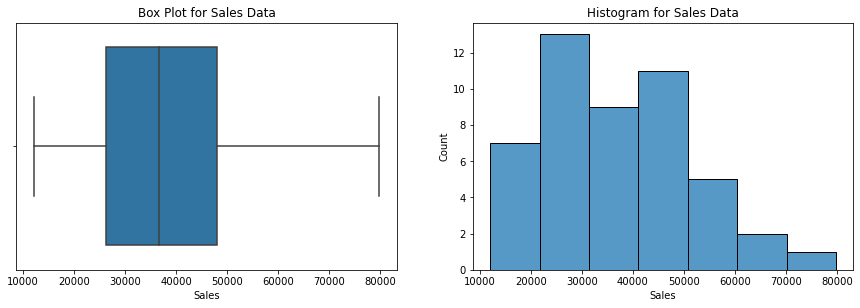

In [29]:
plt.figure(figsize=(15, 10))

plt.subplot(2,2,1)
sns.boxplot(x=final_data['Sales'])
plt.title('Box Plot for Sales Data')

plt.subplot(2,2,2)
sns.histplot(final_data['Sales'])
plt.title('Histogram for Sales Data')

plt.show()

**<font color = 'green'>We observe that there are no outliers present in the Data**

### Train-Test Split

In [30]:
final_data.sort_index(inplace=True)

In [31]:
# Splitting the Data into Train and Test
train_length = 42
train_data = final_data[:train_length]
test_data = final_data[train_length:]

Text(0, 0.5, 'Sales')

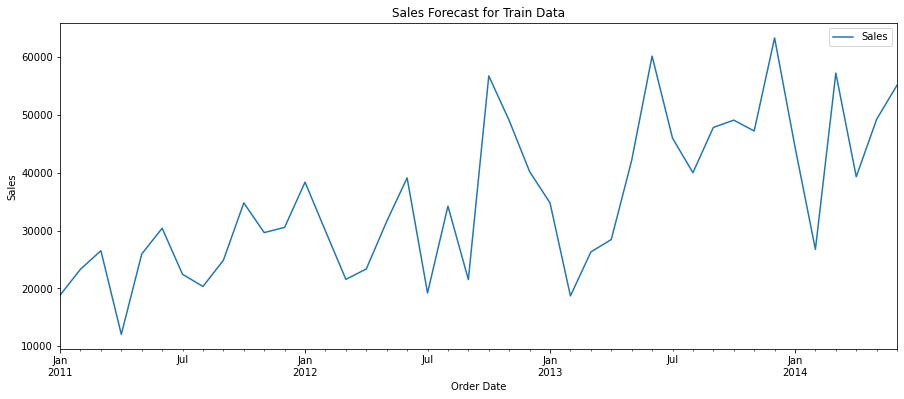

In [32]:
# Plotting the Train Data using Pandas plot function
# --------------------------------------------------
train_data.plot(figsize = (15,6))
plt.title("Sales Forecast for Train Data")
plt.xlabel('Order Date')
plt.ylabel('Sales')

******************
## <font color = 'purple'> PART 2 - Model Building and Evaluation
******************

### Time Series Decomposition

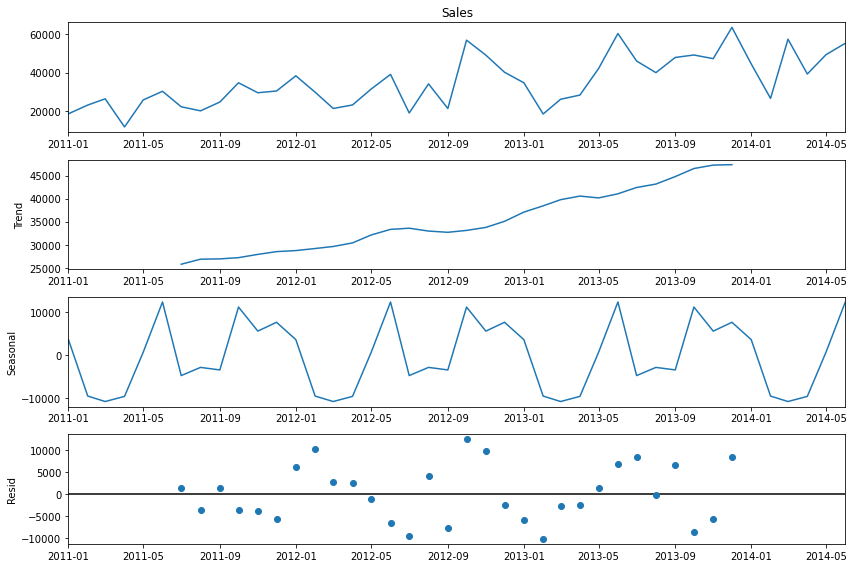

In [33]:
# Additive Seasonal Decomposition
# -------------------------------
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 12, 8
additive_decom = sm.tsa.seasonal_decompose(train_data['Sales'], model='additive')

fig = additive_decom.plot()
plt.show()

<br>

##### For the additive decomposition we observe that -  <br>

<font color = 'green'> **The series is trending upwards, i.e. there is an increasing trend for the sales data.**<br> 
    **There is also some seasonality observed in the series.** <br> 
    **The residuals also does not show a seasonal pattern.**
<br><br>

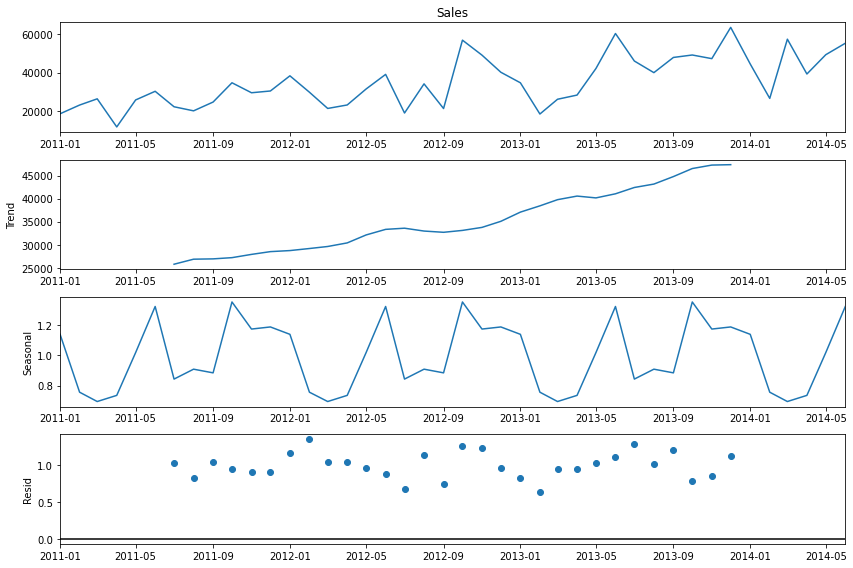

In [34]:
rcParams['figure.figsize'] = 12, 8
multiplicative_decom = sm.tsa.seasonal_decompose(train_data['Sales'],model='multiplicative')

fig = multiplicative_decom.plot()
plt.show()

<br>

##### For the multiplicative decomposition we observe that -  <br>

<font color = 'green'> **The trend and seasonality is nearly the same as the additive decomposition.**<br>
    **There is only some difference in the residuals, but is does not show any seasonal pattern.**
<br><br>

## Choosing the right Time Series Method using the Flow Chart

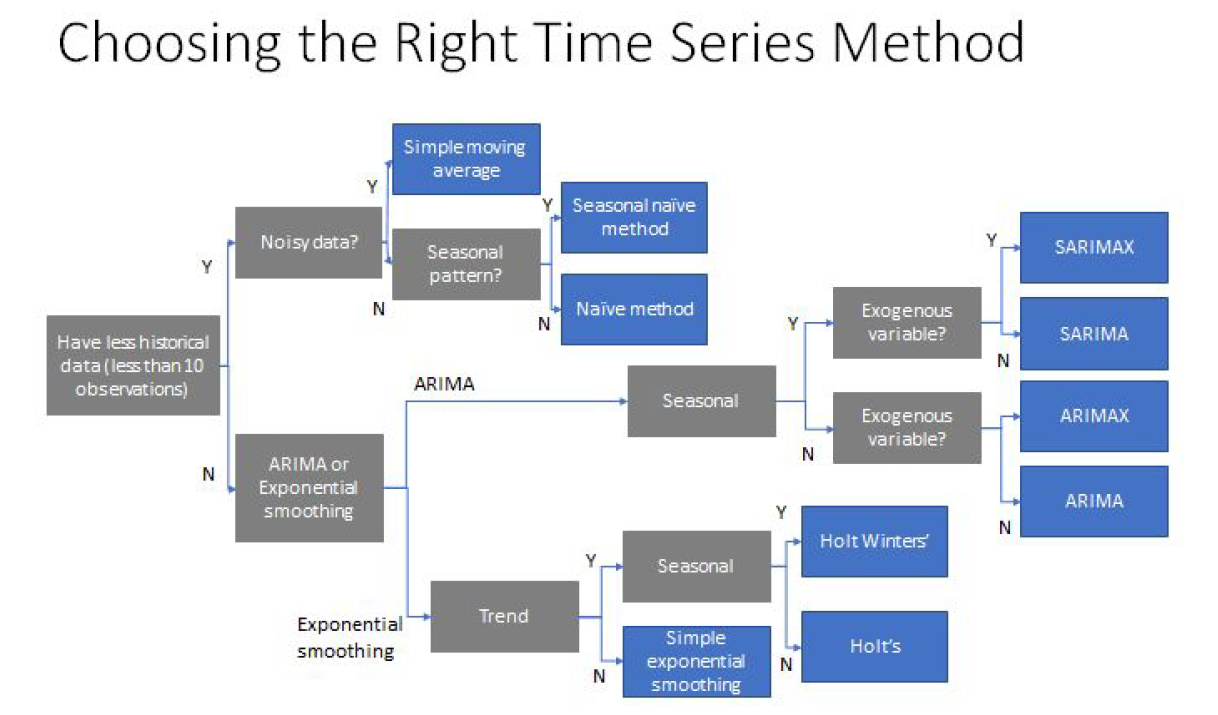

We have the following features for the time series data - 

- 1) The number of data points/observations = 42
- 2) There is an increasing trend for sales data
- 3) There is a seasonality in the data.

**<font color='green'>Thus from the above data we can choose the following methods -**<br><br>
**<font color='green'>Exponential Smoothing Methods** - Holts-Winter Method <br>
**<font color='green'>ARIMA Methods** - SARIMA<br>
    
<br><br>

**We will verify our theoritical hypothesis by using the various forecasting methods as well as the MAPE and RMSE values.**

In [35]:
# We will begin by - 
# Creating a Dataframe to hold RMSE and MAPE values for all the Methods implemented

method_results = pd.DataFrame(columns=['Methods', 'RMSE Value', 'MAPE Value'])

## 1) - Method Type - SMOOTHING
---------------------

### 1.1 - Simple Exponential Smoothing Method

In [36]:
# Building the Simple Exponential Smoothing Model
# -----------------------------------------------
model = SimpleExpSmoothing(train_data['Sales'])
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_ses = test_data.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(len(test_data))


{'smoothing_level': 0.24674418604651163, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 18821.989799999996, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\nitan\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [37]:
# Calculating MAPE and RMSE errors
# --------------------------------
rmse_SES = np.sqrt(mean_squared_error(test_data['Sales'], y_hat_ses['ses_forecast'])).round(2)
mape_SES = np.round(np.mean(np.abs(test_data['Sales']-y_hat_ses['ses_forecast'])/test_data['Sales'])*100,2)

# Adding the values of MAPE and RMSE to the Error Table
# -----------------------------------------------------
method_results.loc[len(method_results.index)] = ['Simple Exponential Smoothing', rmse_SES, mape_SES]
method_results

,Methods,RMSE Value,MAPE Value
0,Simple Exponential Smoothing,14627.34,15.74


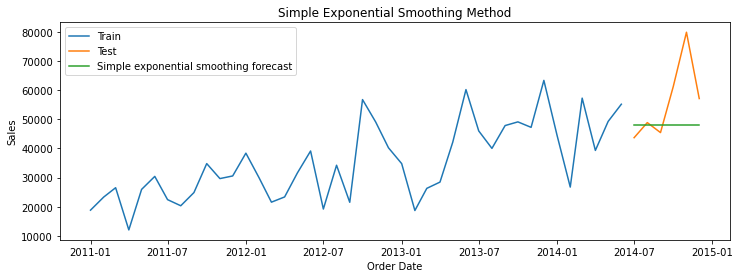

In [38]:
# Plotting the graph for Simple Exponential Smoothing Method
# ----------------------------------------------------------
plt.figure(figsize=(12,4))
plt.plot(train_data['Sales'], label='Train')
plt.plot(test_data['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

In [40]:
# ---------------------------------------------------------------------------------------------------

### 1.2 - Holt's Exponential Smoothing Method

In [41]:
# Building the Holt's Model
# -------------------------
model_fit = Holt(np.asarray(train_data['Sales'])).fit(optimized=True)
print(model_fit.params)
y_hat_holt = test_data.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test_data))

{'smoothing_level': 0.2642857142857143, 'smoothing_trend': 0.19220779220779222, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 18821.989799999996, 'initial_trend': 4491.3633000000045, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\nitan\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [42]:
# Calculating MAPE and RMSE errors
# --------------------------------
rmse_holt = np.sqrt(mean_squared_error(test_data['Sales'], y_hat_holt['holt_forecast'])).round(2)
mape_holt = np.round(np.mean(np.abs(test_data['Sales']-y_hat_holt['holt_forecast'])/test_data['Sales'])*100,2)

# Adding the values of MAPE and RMSE to the Error Table
# -----------------------------------------------------
method_results.loc[len(method_results.index)] = ["Holt's Method", rmse_holt, mape_holt]
method_results

,Methods,RMSE Value,MAPE Value
0,Simple Exponential Smoothing,14627.34,15.74
1,Holt's Method,12403.84,14.93


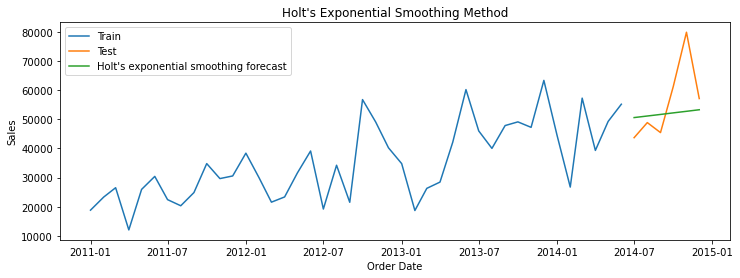

In [43]:
# Plotting the graph for Holt's Method
# ------------------------------------
plt.figure(figsize=(12,4))
plt.plot( train_data['Sales'], label='Train')
plt.plot(test_data['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

In [45]:
# ---------------------------------------------------------------------------------------------------

### 1.3 - Holt-Winter's Exponential Smoothing Method

#### 1.3.1 - Holt-Winter's Additive Model

In [46]:
# HOLT-WINTERS ADDITIVE MODEL
# ---------------------------
y_hat_hwa = test_data.copy()
model = ExponentialSmoothing(np.asarray(train_data['Sales']) ,
                             seasonal_periods=12, # Since we have monthly data -> Seasonal_Period - 12
                             trend='add', 
                             seasonal='add')
model_fit = model.fit(optimized=True)

print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(len(test_data))

{'smoothing_level': 0.07571428571428572, 'smoothing_trend': 0.010816326530612248, 'smoothing_seasonal': 0.1026984126984127, 'damping_trend': nan, 'initial_level': 34110.965325000005, 'initial_trend': 730.4167145833339, 'initial_seasons': array([-15288.975525, -10797.612225,  -7592.473425, -22064.873025,
        -8169.065325,  -3712.033725, -11679.370425, -13779.891825,
        -9250.570425,    676.322775,  -4462.610625,  -3556.103925]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\nitan\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [47]:
# Calculating MAPE and RMSE errors
# --------------------------------
rmse_hw = np.sqrt(mean_squared_error(test_data['Sales'], y_hat_hwa['hw_forecast'])).round(2)
mape_hw = np.round(np.mean(np.abs(test_data['Sales']-y_hat_hwa['hw_forecast'])/test_data['Sales'])*100,2)

# Adding the values of MAPE and RMSE to the Error Table
# -----------------------------------------------------
method_results.loc[len(method_results.index)] = ["Holt-Winter's Additive Method", rmse_hw, mape_hw]
method_results

,Methods,RMSE Value,MAPE Value
0,Simple Exponential Smoothing,14627.34,15.74
1,Holt's Method,12403.84,14.93
2,Holt-Winter's Additive Method,9306.82,10.17


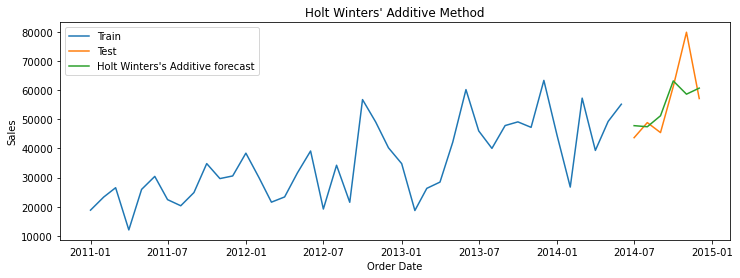

In [48]:
# Plotting the graph for Holt-Winter's Additive Method
# ----------------------------------------------------
plt.figure(figsize=(12,4))
plt.plot( train_data['Sales'], label='Train')
plt.plot(test_data['Sales'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s Additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

#### 1.3.2 - Holt's Winter Multiplicative Method

In [49]:
# HOLT-WINTERS MULTIPLICATIVE MODEL
# ---------------------------------
y_hat_hwa = test_data.copy()
model = ExponentialSmoothing(np.asarray(train_data['Sales']) ,
                             seasonal_periods=12, # Since we have monthly data -> Seasonal_Period - 12
                             trend='add', 
                             seasonal='mul')
model_fit = model.fit(optimized=True)

print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(len(test_data))

{'smoothing_level': 0.040357142857142855, 'smoothing_trend': 0.0001, 'smoothing_seasonal': 0.13709183673469388, 'damping_trend': nan, 'initial_level': 34110.965325000005, 'initial_trend': 730.4167145833339, 'initial_seasons': array([0.55178708, 0.68345627, 0.77741839, 0.35314428, 0.76051498,
       0.8911777 , 0.65760657, 0.5960275 , 0.72880948, 1.01982714,
       0.86917372, 0.89574895]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\nitan\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [50]:
# Calculating MAPE and RMSE errors
# --------------------------------
rmse_hw = np.sqrt(mean_squared_error(test_data['Sales'], y_hat_hwa['hw_forecast'])).round(2)
mape_hw = np.round(np.mean(np.abs(test_data['Sales']-y_hat_hwa['hw_forecast'])/test_data['Sales'])*100,2)

# Adding the values of MAPE and RMSE to the Error Table
# -----------------------------------------------------
method_results.loc[len(method_results.index)] = ["Holt-Winter's Multiplicative Method", rmse_hw, mape_hw]
method_results

,Methods,RMSE Value,MAPE Value
0,Simple Exponential Smoothing,14627.34,15.74
1,Holt's Method,12403.84,14.93
2,Holt-Winter's Additive Method,9306.82,10.17
3,Holt-Winter's Multiplicative Method,9423.23,11.43


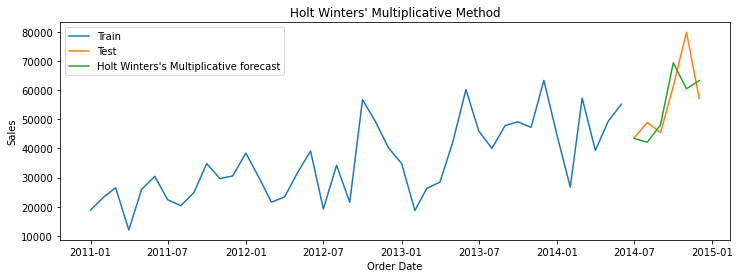

In [51]:
# Plotting the graph for Holt-Winter's Multiplicative Method
# ----------------------------------------------------------
plt.figure(figsize=(12,4))
plt.plot( train_data['Sales'], label='Train')
plt.plot(test_data['Sales'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s Multiplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Multiplicative Method')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

In [52]:
# --------------------------------------------------------------------------------------------------------------

----------------------------------
### <font color='green'> Results and Observations:



- By looking at the plots for the four Smoothing Methods, we observe that the Holt-Winter’s Additive and Holt-Winter’s Multiplicative methods are predicting better than Simple Exponential Smoothing method and Holt’s Exponential Smoothing method.
<br><br>
- Also, by looking at the RMSE & MAPE error values, the Holt-Winter’s Additive Method performs better than the Holt-Winter’s Multiplicative Method.
<br><br>
- This means that Holt-Winter’s Additive Method performs best out of the Smoothing methods for the prediction of the sales forecast.
<br><br>
- **This matches out initial selection of the Holt Winter’s Method for Forecasting which we deduced from the Flow-Chart.**

## 2) - Method Type - AUTO REGRESSIVE (ARIMA Type of Models)
---------------------

In [83]:
# Before moving forward with Auto Regressive Mehthods, we do the following things
# 1 - Box Cox transformation to make variance constant
# 2 - Differencing to remove trend
# 3 - Check for Stationarity
#       > Augmented Dickey-Fuller (ADF) test

### Box Cox transformation to make variance constant

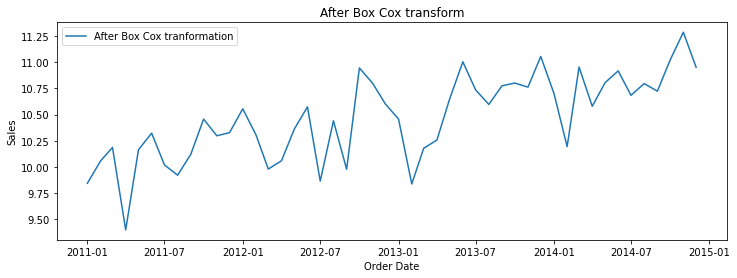

In [54]:
data_boxcox = pd.Series(boxcox(final_data['Sales'], lmbda=0), index = final_data.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

### Differencing to Remove Trend

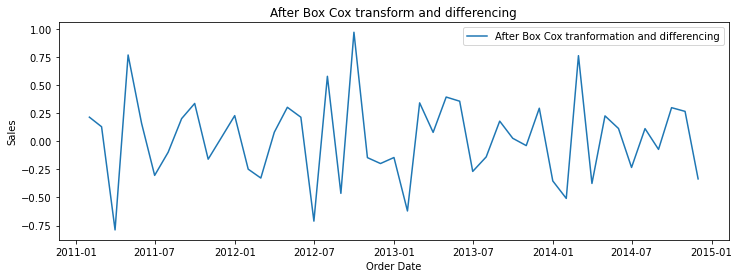

In [55]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), final_data.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

In [56]:
data_boxcox_diff.dropna(inplace=True)
print(data_boxcox_diff.head())
print(data_boxcox_diff.tail())

Order Date
2011-02-01    0.214000
2011-03-01    0.128816
2011-04-01   -0.789102
2011-05-01    0.767119
2011-06-01    0.158548
Freq: MS, dtype: float64
Order Date
2014-08-01    0.112012
2014-09-01   -0.072673
2014-10-01    0.298459
2014-11-01    0.265449
2014-12-01   -0.335151
Freq: MS, dtype: float64


### Checking for Stationarity

#### Augmented Dickey-Fuller (ADF) test

In [57]:
adf_test = adfuller(final_data['Sales'])
print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -3.376024
Critical Values @ 0.05: -2.93
p-value: 0.011804


In [58]:
# Since P-value <= 0.05, therefore the series is Stationary

### Re-Performing the Train-Test Split

In [59]:
train_data_boxcox = data_boxcox[:train_length]
test_data_boxcox = data_boxcox[train_length:]
train_data_boxcox_diff = data_boxcox_diff[:train_length-1]
test_data_boxcox_diff = data_boxcox_diff[train_length-1:]
train_data_boxcox_diff.head()

Order Date
2011-02-01    0.214000
2011-03-01    0.128816
2011-04-01   -0.789102
2011-05-01    0.767119
2011-06-01    0.158548
Freq: MS, dtype: float64

In [60]:
# ------------------------------------------------------------------------------------------------------------------

### 2.1 - Auto Regressive Method (AR)

In [62]:
# Building the Model
# ------------------
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

# Recovering original time series
# -------------------------------
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

const      0.024255
ar.L1.y   -0.406729
dtype: float64


In [63]:
# Calculating MAPE and RMSE errors
# --------------------------------
rmse_AR = np.sqrt(mean_squared_error(test_data['Sales'], y_hat_ar['ar_forecast'][test_data.index.min():])).round(2)
mape_AR = np.round(np.mean(np.abs(test_data['Sales']-y_hat_ar['ar_forecast'][test_data.index.min():])/test_data['Sales'])*100,2)

# Adding the values of MAPE and RMSE to the Error Table
# -----------------------------------------------------
method_results.loc[len(method_results.index)] = ["Auto Regression Method", rmse_AR, mape_AR]
method_results

,Methods,RMSE Value,MAPE Value
0,Simple Exponential Smoothing,14627.34,15.74
1,Holt's Method,12403.84,14.93
2,Holt-Winter's Additive Method,9306.82,10.17
3,Holt-Winter's Multiplicative Method,9423.23,11.43
4,Auto Regression Method,10985.28,13.56


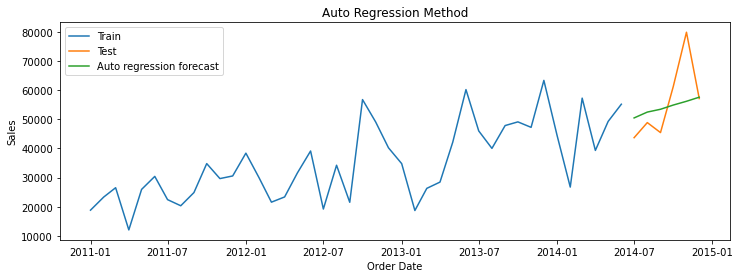

In [64]:
# Plotting the graph for Auto Regression Method
# ---------------------------------------------
plt.figure(figsize=(12,4))
plt.plot(train_data['Sales'], label='Train')
plt.plot(test_data['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test_data.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

In [65]:
# ------------------------------------------------------------------------------------------------------------------

### 2.2 - Moving average method (MA)

In [66]:
# Building the Model
# ------------------
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

# Recover original time series
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

const      0.021415
ma.L1.y   -1.000000
dtype: float64


In [67]:
# Calculating MAPE and RMSE errors
# --------------------------------
rmse_MA = np.sqrt(mean_squared_error(test_data['Sales'], y_hat_ma['ma_forecast'][test_data.index.min():])).round(2)
mape_MA = np.round(np.mean(np.abs(test_data['Sales']-y_hat_ma['ma_forecast'][test_data.index.min():])/test_data['Sales'])*100,2)

# Adding the values of MAPE and RMSE to the Error Table
# -----------------------------------------------------
method_results.loc[len(method_results.index)] = ["Moving Average", rmse_MA, mape_MA]
method_results

,Methods,RMSE Value,MAPE Value
0,Simple Exponential Smoothing,14627.34,15.74
1,Holt's Method,12403.84,14.93
2,Holt-Winter's Additive Method,9306.82,10.17
3,Holt-Winter's Multiplicative Method,9423.23,11.43
4,Auto Regression Method,10985.28,13.56
5,Moving Average,23360.02,33.93


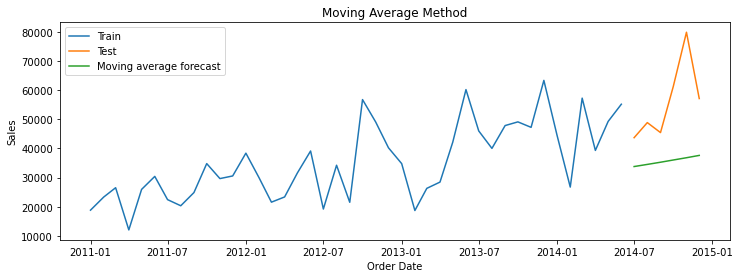

In [68]:
# Plotting the Graph for Moving Average Method
# --------------------------------------------

plt.figure(figsize=(12,4))
plt.plot(final_data['Sales'][:train_length], label='Train')
plt.plot(final_data['Sales'][train_length:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test_data.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

In [69]:
# ------------------------------------------------------------------------------------------------------------------

### 2.3 - Auto Regressive Moving Average

In [70]:
# Building the Model
# -----------------
model_fit = ARIMA(train_data_boxcox_diff, order=(1, 0, 1)).fit()
print(model_fit.params)

# Recovering original time series
# -------------------------------
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

const      0.02147
ar.L1.y    0.07458
ma.L1.y   -1.00000
dtype: float64


In [71]:
# Calculating MAPE and RMSE errors
# --------------------------------
rmse_ARMA = np.sqrt(mean_squared_error(test_data['Sales'], y_hat_arma['arma_forecast'][train_length-1:])).round(2)
mape_ARMA = np.round(np.mean(np.abs(test_data['Sales']-y_hat_arma['arma_forecast'][train_length-1:])/test_data['Sales'])*100,2)

# Adding the values of MAPE and RMSE to the Error Table
# -----------------------------------------------------
method_results.loc[len(method_results.index)] = ["Auto Regressive Moving Average (ARMA)", rmse_ARMA, mape_ARMA]
method_results

,Methods,RMSE Value,MAPE Value
0,Simple Exponential Smoothing,14627.34,15.74
1,Holt's Method,12403.84,14.93
2,Holt-Winter's Additive Method,9306.82,10.17
3,Holt-Winter's Multiplicative Method,9423.23,11.43
4,Auto Regression Method,10985.28,13.56
5,Moving Average,23360.02,33.93
6,Auto Regressive Moving Average (ARMA),22654.32,32.40


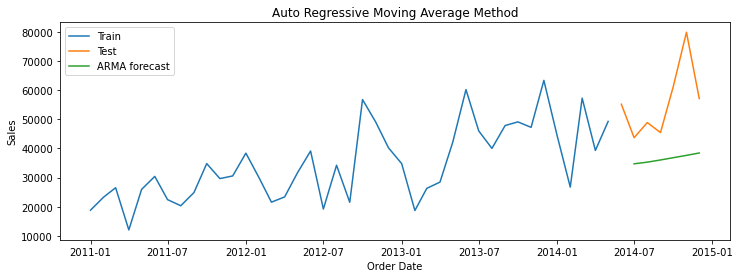

In [72]:
# Plotting the Graph for ARMA Method
# ----------------------------------
plt.figure(figsize=(12,4))
plt.plot( final_data['Sales'][:train_length-1], label='Train')
plt.plot(final_data['Sales'][train_length-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test_data.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('Auto Regressive Moving Average Method')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

In [73]:
# ------------------------------------------------------------------------------------------------------------------

### 2.4 - Auto Regressive Integrated Moving Average (ARIMA)

In [74]:
# Building the Model
# ------------------
model_fit = ARIMA(train_data_boxcox, order=(1, 1, 1)).fit()
print(model_fit.params)

# Recover original time series forecast
# -------------------------------------
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

const        0.02147
ar.L1.D.y    0.07458
ma.L1.D.y   -1.00000
dtype: float64


In [75]:
# Calculating MAPE and RMSE errors
# --------------------------------
rmse_ARIMA = np.sqrt(mean_squared_error(test_data['Sales'], y_hat_arima['arima_forecast'][test_data.index.min():])).round(2)
mape_ARIMA = np.round(np.mean(np.abs(test_data['Sales']-y_hat_arima['arima_forecast'][test_data.index.min():])/test_data['Sales'])*100,2)

# Adding the values of MAPE and RMSE to the Error Table
# -----------------------------------------------------
method_results.loc[len(method_results.index)] = ["Auto Regressive Integrated Moving Average (ARIMA)", rmse_ARIMA, mape_ARIMA]
method_results

,Methods,RMSE Value,MAPE Value
0,Simple Exponential Smoothing,14627.34,15.74
1,Holt's Method,12403.84,14.93
2,Holt-Winter's Additive Method,9306.82,10.17
3,Holt-Winter's Multiplicative Method,9423.23,11.43
4,Auto Regression Method,10985.28,13.56
5,Moving Average,23360.02,33.93
6,Auto Regressive Moving Average (ARMA),22654.32,32.40
7,Auto Regressive Integrated Moving Average (ARIMA),22654.32,32.40


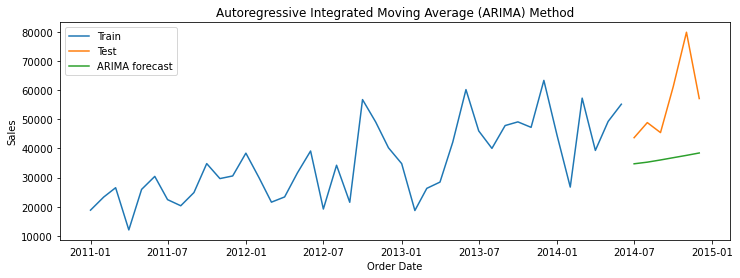

In [76]:
# Plotting the graph for ARIMA Model
# ----------------------------------
plt.figure(figsize=(12,4))
plt.plot(train_data['Sales'], label='Train')
plt.plot(test_data['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test_data.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive Integrated Moving Average (ARIMA) Method')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

In [77]:
# ------------------------------------------------------------------------------------------------------------------

### 2.5 - Seasonal auto regressive integrated moving average (SARIMA)

In [78]:
# Building the Model
# ------------------
model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit() 
print(model_fit.params)

# Recover original time series forecast
# -------------------------------------
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

ar.L1      -0.041535
ma.L1      -0.996177
ar.S.L12    0.099921
ma.S.L12   -0.963155
sigma2      0.058797
dtype: float64


In [79]:
# Calculating MAPE and RMSE errors
# --------------------------------
rmse_SARIMA = np.sqrt(mean_squared_error(test_data['Sales'], y_hat_sarima['sarima_forecast'][test_data.index.min():])).round(2)
mape_SARIMA = np.round(np.mean(np.abs(test_data['Sales']-y_hat_sarima['sarima_forecast'][test_data.index.min():])/test_data['Sales'])*100,2)

# Adding the values of MAPE and RMSE to the Error Table
# -----------------------------------------------------
method_results.loc[len(method_results.index)] = ["Seasonal Auto Regressive Integrated Moving Average (SARIMA)", rmse_SARIMA, mape_SARIMA]
method_results

,Methods,RMSE Value,MAPE Value
0,Simple Exponential Smoothing,14627.34,15.74
1,Holt's Method,12403.84,14.93
2,Holt-Winter's Additive Method,9306.82,10.17
3,Holt-Winter's Multiplicative Method,9423.23,11.43
4,Auto Regression Method,10985.28,13.56
5,Moving Average,23360.02,33.93
6,Auto Regressive Moving Average (ARMA),22654.32,32.40
7,Auto Regressive Integrated Moving Average (ARIMA),22654.32,32.40
8,Seasonal Auto Regressive Integrated Moving Ave...,9618.62,12.88


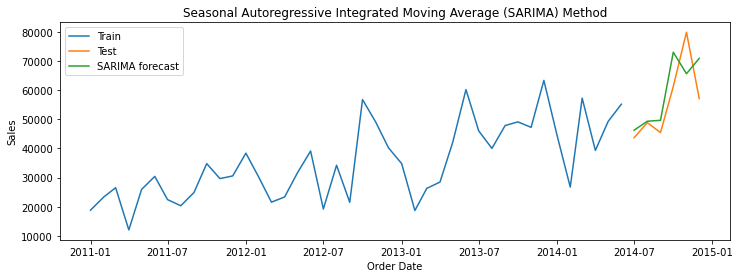

In [80]:
# Plotting the graphy for SARIMA Model
# ------------------------------------
plt.figure(figsize=(12,4))
plt.plot(train_data['Sales'], label='Train')
plt.plot(test_data['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test_data.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal Autoregressive Integrated Moving Average (SARIMA) Method')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

----------------------------------
### <font color='green'> Results and Observations:



- Looking at the plots for various Autoregressive methods, we observe that Moving Average, Autoregressive Moving Average (ARMA), and Autoregressive Integrated Moving Average (ARIMA) performed really badly in predicting the forecast for the Sales.
<br><br>
- Whereas Auto Regression Method (AR) and the Seasonal Autoregressive Integrated Moving Average Method (SARIMA) performed really well in predicting the forecast for the Sales.
<br><br>
- On comparison of AR and SARIMA model, we observe that MAPE errors observed for the SARIMA method is lower than that of the AR method.
<br><br>
- This means that SARIMA is the most suitable out of the Auto-Regressive methods for forecasting the  Sales.
<br><br>
- **This matches out initial selection of the SARIMA Method for Forecasting which we deduced from the Flow-Chart**.


In [81]:
# Setting the Methods as the index
# --------------------------------
method_results.set_index('Methods', inplace = True)

In [82]:
# Printing the Methods with their RMSE and MAPE values
# ----------------------------------------------------
print(method_results)

                                                    RMSE Value  MAPE Value
Methods                                                                   
Simple Exponential Smoothing                          14627.34       15.74
Holt's Method                                         12403.84       14.93
Holt-Winter's Additive Method                          9306.82       10.17
Holt-Winter's Multiplicative Method                    9423.23       11.43
Auto Regression Method                                10985.28       13.56
Moving Average                                        23360.02       33.93
Auto Regressive Moving Average (ARMA)                 22654.32       32.40
Auto Regressive Integrated Moving Average (ARIMA)     22654.32       32.40
Seasonal Auto Regressive Integrated Moving Aver...     9618.62       12.88


----------------------------------
----------------------------------
## <font color='green'> CONCLUSION
----------------------------------
----------------------------------

#### We observed that out of the Smoothing methods, Holt-Winter’s Additive Smoothing Method performed best, whereas from the Auto-Regressive Methods, the SARIMA model performed best.


#### On comparing both these methods by looking at their MAPE Errors, we can conclude that the Holt-Winter’s Additive Smoothing Method performs best in Predicting the forecast of future sales.
  
    
### <font color = 'green'> <p style='text-align: center;'>Most Profitable Market Segment – APAC-Consumers </p>
### <font color = 'green'> <p style='text-align: center;'> Most Effective Method for Forecasting – Holt-Winter’s Additive Smoothing Method </p>


-------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------